## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isnull().sum()
# пропусков в X нет
len(y)
# пропусков в y нет
# у нас чистый датасет с отсутствием категориальных переменных

from sklearn.impute import SimpleImputer
print((X.dtypes == "object").values)
# Проверка на наличие категориальных признаков пройдена, визуально и по описанию их тоже нет 


[False False False False False False False False False False False False
 False]


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

# посмотрел все получившиеся выборки, они правильны, они зафиксированы


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
# Так, чтобы все работало, нужно 1) запустить предыдущий кусок кода 2) запустить этот кусок кода, иначе X_train & X_test не будут определены
# Чтобы было удобнее, при проверке скопируйте код предыдущей задачи и вставьте в начало этой

from sklearn.preprocessing import StandardScaler

# Теперь оставлю два признака, конечно, логичнее просто создать новый X, добавив 2 признака, но мне лень вспоминать, просто уберу 11 :)

del X_train['ash']
del X_train['malic_acid']
del X_train['alcalinity_of_ash']
del X_train['total_phenols']
del X_train['flavanoids']
del X_train['nonflavanoid_phenols']
del X_train['proanthocyanins']
del X_train['color_intensity']
del X_train['hue']
del X_train['od280/od315_of_diluted_wines']
del X_train['proline']
del X_test['ash']
del X_test['malic_acid']
del X_test['alcalinity_of_ash']
del X_test['total_phenols']
del X_test['flavanoids']
del X_test['nonflavanoid_phenols']
del X_test['proanthocyanins']
del X_test['color_intensity']
del X_test['hue']
del X_test['od280/od315_of_diluted_wines']
del X_test['proline']

# Это была очень плохая идея, извините


normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_train)
X_train_norm = pd.DataFrame(data=X_real_norm_np)
X_real_norm_pn = normalizer.fit_transform(X_test)
X_test_norm = pd.DataFrame(data=X_real_norm_pn)

# Про перемешивание ничего не сказано, так что я его не делаю

from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance


print(f"NN    Train    Test")
y_predicted_tr = KNeighborsClassifier(n_neighbors=1, metric = "euclidean").fit(X_train_norm, y_train).predict(X_train_norm)
y_predicted_tst = KNeighborsClassifier(n_neighbors=1, metric = "euclidean").fit(X_train_norm, y_train).predict(X_test_norm)
print(f"{1}     {np.mean(y_predicted_tr==y_train):.3f}    {np.mean(y_predicted_tst==y_test):.3f}")
y_predicted_tr = KNeighborsClassifier(n_neighbors=3, metric = "euclidean").fit(X_train_norm, y_train).predict(X_train_norm)
y_predicted_tst = KNeighborsClassifier(n_neighbors=3, metric = "euclidean").fit(X_train_norm, y_train).predict(X_test_norm)
print(f"{3}     {np.mean(y_predicted_tr==y_train):.3f}    {np.mean(y_predicted_tst==y_test):.3f}")
y_predicted_tr = KNeighborsClassifier(n_neighbors=5, metric = "euclidean").fit(X_train_norm, y_train).predict(X_train_norm)
y_predicted_tst = KNeighborsClassifier(n_neighbors=5, metric = "euclidean").fit(X_train_norm, y_train).predict(X_test_norm)
print(f"{5}     {np.mean(y_predicted_tr==y_train):.3f}    {np.mean(y_predicted_tst==y_test):.3f}")
y_predicted_tr = KNeighborsClassifier(n_neighbors=10, metric = "euclidean").fit(X_train_norm, y_train).predict(X_train_norm)
y_predicted_tst = KNeighborsClassifier(n_neighbors=10, metric = "euclidean").fit(X_train_norm, y_train).predict(X_test_norm)
print(f"{10}    {np.mean(y_predicted_tr==y_train):.3f}    {np.mean(y_predicted_tst==y_test):.3f}")
y_predicted_tr = KNeighborsClassifier(n_neighbors=15, metric = "euclidean").fit(X_train_norm, y_train).predict(X_train_norm)
y_predicted_tst = KNeighborsClassifier(n_neighbors=15, metric = "euclidean").fit(X_train_norm, y_train).predict(X_test_norm)
print(f"{15}    {np.mean(y_predicted_tr==y_train):.3f}    {np.mean(y_predicted_tst==y_test):.3f}")
y_predicted_tr = KNeighborsClassifier(n_neighbors=25, metric = "euclidean").fit(X_train_norm, y_train).predict(X_train_norm)
y_predicted_tst = KNeighborsClassifier(n_neighbors=25, metric = "euclidean").fit(X_train_norm, y_train).predict(X_test_norm)
print(f"{25}    {np.mean(y_predicted_tr==y_train):.3f}    {np.mean(y_predicted_tst==y_test):.3f}")







NN    Train    Test
1     1.000    0.667
3     0.806    0.722
5     0.750    0.685
10    0.734    0.704
15    0.734    0.815
25    0.669    0.815


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
pip install mlxtend --no-deps

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

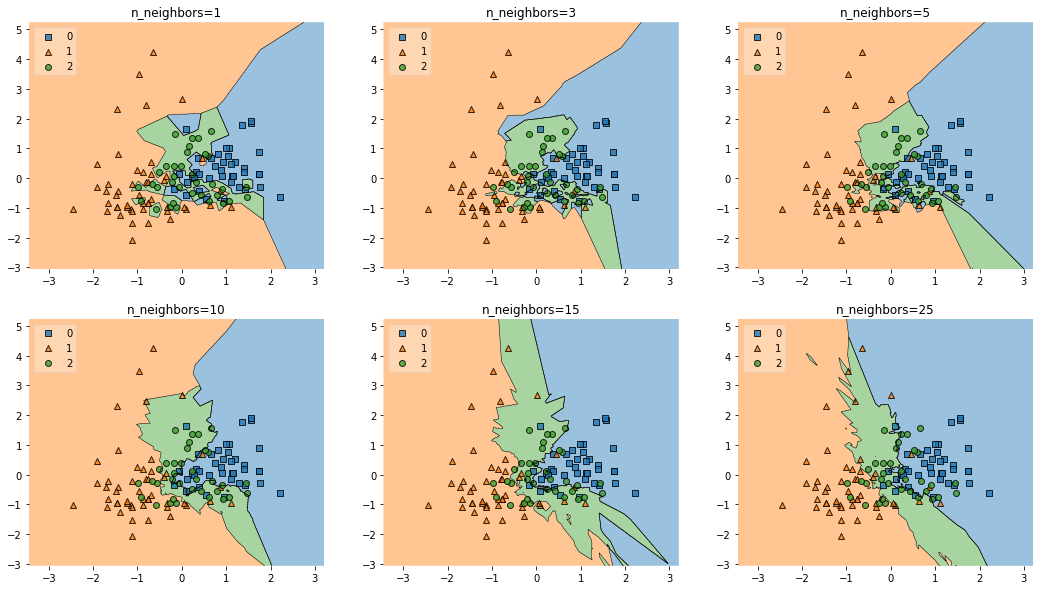

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import itertools
import numpy as np

gs = gridspec.GridSpec(ncols=3, nrows=2)

fig = plt.figure(figsize=(18,10))
clf1 = KNeighborsClassifier(n_neighbors=1)
clf3 = KNeighborsClassifier(n_neighbors=3)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf10 = KNeighborsClassifier(n_neighbors=10)
clf15 = KNeighborsClassifier(n_neighbors=15)
clf25 = KNeighborsClassifier(n_neighbors=25)
labels = ['n_neighbors=1', 'n_neighbors=3', 'n_neighbors=5', 'n_neighbors=10', 'n_neighbors=15', 'n_neighbors=25']
for clf, lab, grd in zip([clf1, clf3, clf5, clf10, clf15, clf25],
                         labels,
                         itertools.product([0,1,2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    clf.fit(X_train_norm, y_train)
    fig = plot_decision_regions(X_train_norm.to_numpy(), y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()



**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
В целом я могу сказать, что получил не очень хороший результат на тренировочных данных, ожидал еще более низкого на тестовых, но, к моему удивлению, 
я получил как минимум сопоставимые цифры. Странно, что для трейна аккураси падает, а для теста растет вместе с ростом числа соседей. Вероятно это
обусловлено небольшим количеством данных. Тем не менее, я в целом доволен точностью на тестовых данных. 

Очень сложно выбрать оптимальное число соседей, потому что результаты не трейне и тесте противоречивы, но я бы выбрал k=10, исходя из визуальной
интерпретации, это самый логичный вариант. Плюс k=10 является неким компромиссом между тренировочными и тестировочными результатами.



### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

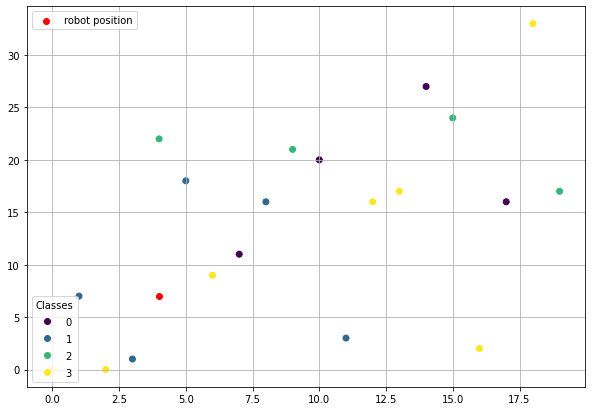

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]

        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
      choice = np.random.binomial(1, 0.2)
      if choice == 1:
        self.trajectory.append(self.mapping[0] + self.trajectory[-1])
      else:
        pred_class = self.knn.predict(self.trajectory[-1].reshape(1,2))
        self.trajectory.append(self.mapping[pred_class[0]] + self.trajectory[-1])

9


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [ ]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

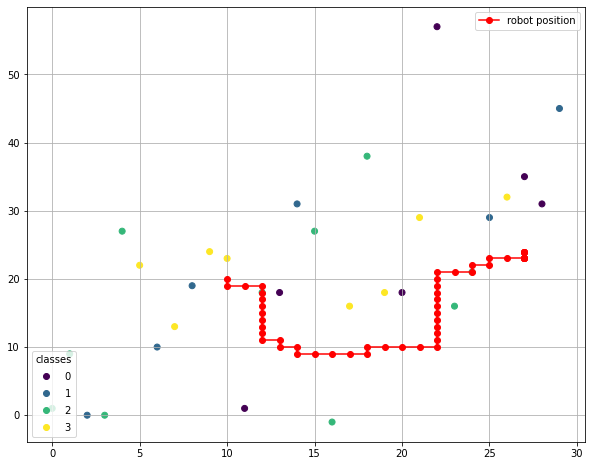

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

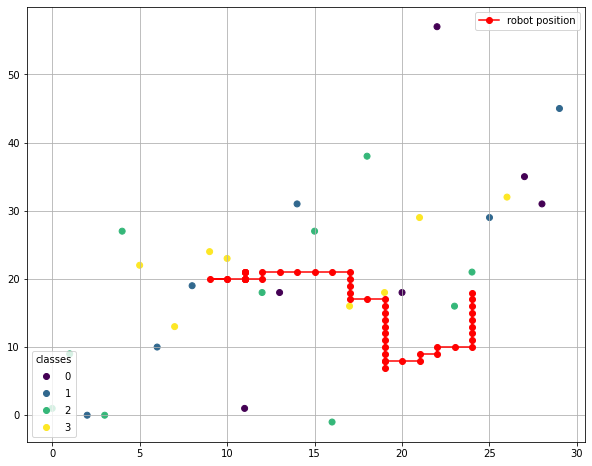

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

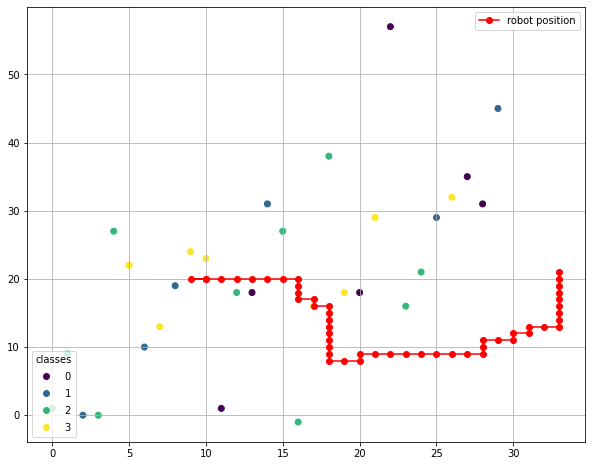

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

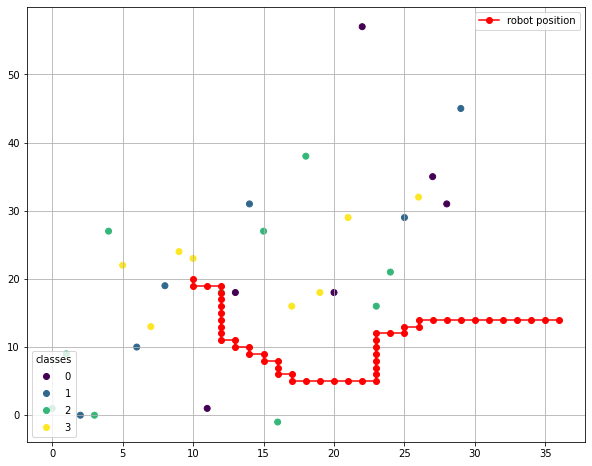

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 7, n_movements = 50)

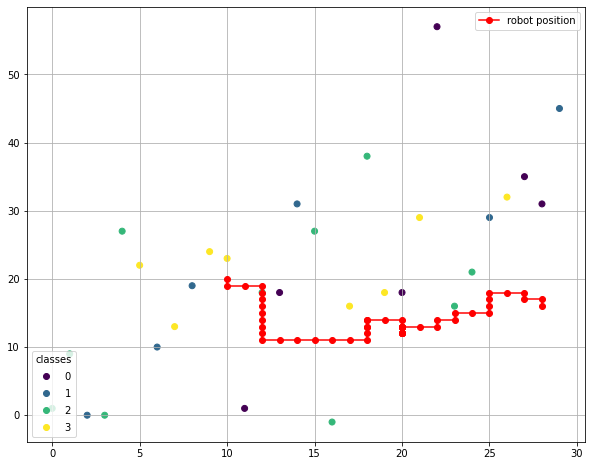

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

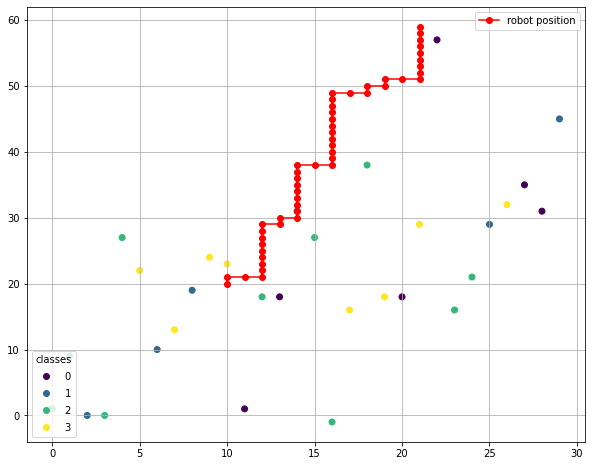

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 28, n_movements = 50)

Так, ну могу сказать, что точки неравномерно распределены плюс самое число точек не то чтобы большое. Поэтому чем больше число соседей - тем ближе поведение робота к "посчитать все точки на графике и сделать вывод", что проявлено в крайней форме на пятом графике (если я правильно посчитал - всего точек 28), соответственно движение приняло форму "либо 0,2 вправо либо вверх". Говоря в целом, чем меньше число соседей, тем более чувствителен робот к ситуации в том месте, где он находится, и на первом графике (за исключением вероятности пойти вправо) он наиболее явно отображает ситуацию на поле.

Если бы меткам присваивались классы осмысленно - (извините, тире нет под рукой, это ко всем дефисам относится), очевидно, что движение робота было бы обусловлено количеством точек, распределением классов и количеством ближайших соседей, но как-то определенно это сформулировать сложно, ведь назначить классы и количество точек можно на любой вкус!  

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw04-knn-linreg-data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
data.isnull().sum()

# данные полны, удалять ничего не надо

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
# Есть "Unnamed: 0", уберем
del data['Unnamed: 0']
data



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
data.corr()

# Насколько я понимаю, целевая - price, тогда carat, x, y, z коррелируют больше всего

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data_dum = pd.get_dummies(data)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data_dum.drop('price', axis=1)
y = data_dum['price']

from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
# Проверил размеры того, что получилось, все ок

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_train)
X_train_norm = pd.DataFrame(data=X_real_norm_np)
X_real_norm_pn = normalizer.fit_transform(X_test)
X_test_norm = pd.DataFrame(data=X_real_norm_pn)
X_train_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461,-0.175564,-0.316757,1.223205,-0.584466,-0.536788,-0.380169,-0.470519,-0.467914,1.954578,-0.424712,-0.335399,-0.232918,-0.119887,-0.185726,-0.565871,-0.453467,2.379167,-0.542516,-0.269914,-0.321994
1,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486,-0.175564,-0.316757,1.223205,-0.584466,-0.536788,-0.380169,-0.470519,-0.467914,-0.511619,2.354538,-0.335399,-0.232918,-0.119887,-0.185726,-0.565871,-0.453467,-0.420315,-0.542516,-0.269914,3.105648
2,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576,-0.175564,-0.316757,-0.817524,-0.584466,1.862933,-0.380169,2.125312,-0.467914,-0.511619,-0.424712,-0.335399,-0.232918,-0.119887,-0.185726,-0.565871,2.205231,-0.420315,-0.542516,-0.269914,-0.321994
3,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040,-0.175564,-0.316757,1.223205,-0.584466,-0.536788,-0.380169,-0.470519,2.137144,-0.511619,-0.424712,-0.335399,-0.232918,-0.119887,-0.185726,-0.565871,-0.453467,2.379167,-0.542516,-0.269914,-0.321994
4,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121,-0.175564,-0.316757,1.223205,-0.584466,-0.536788,-0.380169,2.125312,-0.467914,-0.511619,-0.424712,-0.335399,-0.232918,-0.119887,-0.185726,-0.565871,-0.453467,-0.420315,-0.542516,-0.269914,3.105648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.586462,-0.735774,0.694075,-0.491325,-0.515570,-0.575740,-0.175564,-0.316757,-0.817524,1.710964,-0.536788,-0.380169,-0.470519,2.137144,-0.511619,-0.424712,-0.335399,-0.232918,-0.119887,-0.185726,-0.565871,-0.453467,-0.420315,1.843265,-0.269914,-0.321994
37754,-0.207259,1.285965,1.141980,-0.126283,-0.195237,-0.041387,-0.175564,3.156992,-0.817524,-0.584466,-0.536788,2.630408,-0.470519,-0.467914,-0.511619,-0.424712,-0.335399,-0.232918,-0.119887,-0.185726,1.767188,-0.453467,-0.420315,-0.542516,-0.269914,-0.321994
37755,-1.007799,-0.317483,0.246171,-1.230311,-1.164894,-1.208526,-0.175564,-0.316757,-0.817524,1.710964,-0.536788,-0.380169,-0.470519,-0.467914,-0.511619,-0.424712,2.981522,-0.232918,-0.119887,-0.185726,-0.565871,-0.453467,2.379167,-0.542516,-0.269914,-0.321994
37756,-0.818197,-0.526628,-0.201734,-0.820753,-0.818588,-0.856978,-0.175564,-0.316757,1.223205,-0.584466,-0.536788,-0.380169,-0.470519,-0.467914,1.954578,-0.424712,-0.335399,-0.232918,-0.119887,5.384280,-0.565871,-0.453467,-0.420315,-0.542516,-0.269914,-0.321994


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train_norm,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_norm))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_norm))))



Train: 1284661.862119126
Test: 1259417.9837047698



**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
i = 0
while i != 26:
    print(X.columns[i], abs(lr.coef_[i]))
    i += 1

# Я все понимаю, просто других способов в голову не пришло, но тут все видно и все отобразилось верно
# Значения проверил, они какие-то странные, но код, через который я их получал вроде как верный
# Литералли на порядок превышают X и carat. Могу также сказать, что в целом значения перекодированных признаков выше

carat 5278.119983938954
depth 94.26693610935274
table 65.6183722683892
x 1050.0247597557245
y 2.6473797066538194
z 40.568622988910526
cut_Fair 117.6574749016424
cut_Good 42.94686904593672
cut_Ideal 51.432728951434015
cut_Premium 13.49246726056724
cut_Very Good 3.1698059148022306
color_D 198.6667838064939
color_E 160.82851983011415
color_F 138.64446872336958
color_G 59.826136568444255
color_H 124.32005476575863
color_I 250.4451528298561
color_J 385.58790594687537
clarity_I1 474.51806798923144
clarity_IF 236.73479731156294
clarity_SI1 147.68717065793058
clarity_SI2 493.87810378921563
clarity_VS1 206.29079770915044
clarity_VS2 107.97996454838012
clarity_VVS1 253.24967218797136
clarity_VVS2 274.14108133851107


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lr_lasso = Lasso(10.0).fit(X_train_norm, y_train)
lr_ridge = Ridge(10.0).fit(X_train_norm, y_train)
i = 0
n = 0
while i != 26:
  print("Lasso:", X.columns[i], lr_lasso.coef_[i])
  i += 1
while n != 26:
  print("Ridge:", X.columns[n], lr_ridge.coef_[n])
  n += 1


Lasso: carat 4817.915546007359
Lasso: depth -61.3293609107025
Lasso: table -52.851035145067144
Lasso: x -603.8288752494609
Lasso: y -0.0
Lasso: z -49.861981067729104
Lasso: cut_Fair -119.35506394196604
Lasso: cut_Good -43.87824160171695
Lasso: cut_Ideal 42.04877231638149
Lasso: cut_Premium 0.0
Lasso: cut_Very Good -0.0
Lasso: color_D 132.17822790765013
Lasso: color_E 87.59862795287549
Lasso: color_F 64.6504572177587
Lasso: color_G -0.0
Lasso: color_H -170.38283084337598
Lasso: color_I -281.0198002486517
Lasso: color_J -402.99172244948966
Lasso: clarity_I1 -492.2514645646717
Lasso: clarity_IF 183.95327159741743
Lasso: clarity_SI1 -259.6506047995805
Lasso: clarity_SI2 -582.090137825929
Lasso: clarity_VS1 101.01732550528884
Lasso: clarity_VS2 -0.0
Lasso: clarity_VVS1 183.4956168770414
Lasso: clarity_VVS2 191.76300352174115
Ridge: carat 5241.743116048574
Ridge: depth -91.79815462067565
Ridge: table -65.35375207998177
Ridge: x -1008.6854536371052
Ridge: y -4.878162973932083
Ridge: z -44.356

Веса существенно уменьшились. В изначальной регрессии проблема мультиколлинеарности проявлялась очень сильно, это видно как минимум по матрице корреляции

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254169305.8648224, tolerance: 60080607.47091246
  positive)


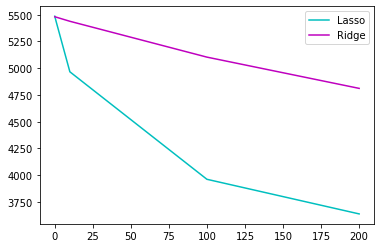

In [ ]:
lasso = []
ridge = []
par_reg = [0.1, 1, 10, 100, 200]
for i in par_reg:
  lr_lasso = Lasso(i).fit(X_train_norm, y_train)
  lr_ridge = Ridge(i).fit(X_train_norm, y_train)
  lasso.append(np.linalg.norm(lr_lasso.coef_))
  ridge.append(np.linalg.norm(lr_ridge.coef_))

y1 = plt.plot(par_reg, lasso, color='c', label = 'Lasso')
y2 = plt.plot(par_reg, ridge, color='m', label = 'Ridge')

plt.legend()


In [ ]:
Из графика очевидно, что Лассо агрессивнее уменьшает веса. Лассо-регрессию используют довольно часто тогда, когда требуется 
сократить количество признаков (Лассо может их занулять) и сконцентрироваться на основных.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, alphas = par_reg)
lasso_cv.fit(X_train_norm, y_train)
i = 0
while i != 5:
  print(par_reg[i], lasso_cv.mse_path_.mean(axis=0)[i])
  i += 1

# Очевидно, что значение 100 дает наилучшее качество

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118783727.7994995, tolerance: 48309472.87280814
  tol, rng, random, positive)


0.1 1564367.6592902022
1 1417934.7480127926
10 1524788.540636396
100 1406284.5939364005
200 1453033.634159984


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso_train =  Lasso(100.0).fit(X_train_norm, y_train)

i = 0
while i != 26:
  print(X.columns[i], lasso_train.coef_[i])
  i += 1

carat 3891.256415536465
depth -0.0
table -0.0
x 0.0
y 0.0
z 0.0
cut_Fair -67.53175063268532
cut_Good -0.0
cut_Ideal 21.45089850466501
cut_Premium -0.0
cut_Very Good -0.0
color_D 0.1290520689941739
color_E 0.0
color_F 0.0
color_G 0.0
color_H -83.7043087592599
color_I -163.21841257416233
color_J -280.7312717866309
clarity_I1 -393.28103582590984
clarity_IF 72.67632662848872
clarity_SI1 -208.56933492444517
clarity_SI2 -469.1972112239046
clarity_VS1 0.0
clarity_VS2 -0.0
clarity_VVS1 69.19344061307667
clarity_VVS2 89.65975911602587


Мы видим, что многие признаки, которые изначально были категориальными, в результате Лассо регрессии обнулились. Как и следовало ожидать, основной вклад в стоимость бриллианта вносит его масса. Есть много классов clarity (как я понимаю, прозрачность) бриллианта. Видимо, это важный признак.
Можем заметить, что цвет почти никак не влияет на стоимость. Зато, что более чем ожидаемо, плохая работа огранщика сильно снижает цену бриллианта.

У нас решена проблема мультиколлинеарности: x,y,z (высокая коррреляция с ценой) обнулены, поскольку имеют также высокую корреляцию с каратностью (по сути, Lasso избавил нас от четверного учета размеров бриллианта). Убирание Table и Depth тоже снижает мультиколлинеарность. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
print("Test: {}".format(mean_squared_error(y_test, lasso_train.predict(X_test_norm))))


Test: 1521602.6513050676


Очевидно, что Lasso оказалась хуже обычной линейной регресии, разница составила примерно 25%. Исходя из этого факта, лучше использовать обычную линейную регрессию. Скорее всего, такой результат объясняется слишком большой потерей признаков в результате применения Lasso

